<a href="https://colab.research.google.com/github/avivavraham/nintex_assignment/blob/main/sentiment_analysis_nintex_interview_with_Aviv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Crocs Product Reviews

This notebook explores the sentiment of customer reviews for Crocs using various techniques. Following sections detail the code implementation:




## 1. Preparations





### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import re

### load the data set from Kaggle: [Crocs Product Reviews](https://www.kaggle.com/datasets/chandlerunderwood/crocs-clog-reviews/data)

In [72]:
# Load the dataset
df = pd.read_csv("/content/croc_reviews.csv", index_col="id")

### install architecture from Hugging Face

In [4]:
! pip install transformers

## 2. EDA


### Data Overview

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9238 entries, croc_review_0 to croc_review_9127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  9238 non-null   object 
 1   date    9238 non-null   object 
 2   rating  9238 non-null   float64
dtypes: float64(1), object(2)
memory usage: 288.7+ KB
None


In [6]:
print(df.head(3).to_string(max_colwidth=100))

                                                                                                            review            date  rating
id                                                                                                                                        
croc_review_0                                                                   !!!!!! E X C E L L E N T!!!!!!!!!!   April 7, 2022     5.0
croc_review_1                                                         "They're crocs; people know what crocs are."   April 3, 2021     5.0
croc_review_2  - Quick delivery and the product arrived when the company said it would. - First pair of Crocs, ...  March 19, 2023     5.0


###  2.1. Descriptive Statistics for the ratings:

In [7]:
print(df.describe())

            rating
count  9238.000000
mean      4.619182
std       0.980280
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000


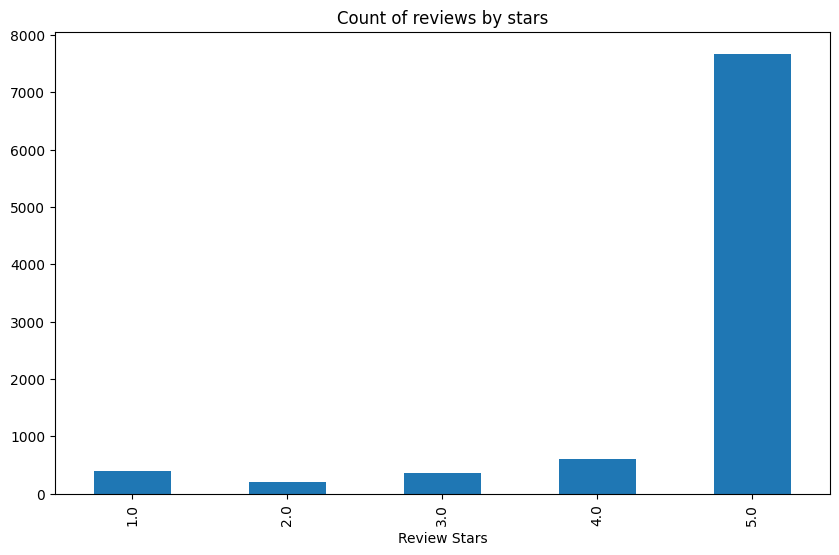

In [8]:
# Distribution Analysis
ax = df['rating'].value_counts().sort_index().plot(
    kind='bar',
    title= 'Count of reviews by stars',
    figsize = (10,6)
)
ax.set_xlabel('Review Stars')
plt.show()

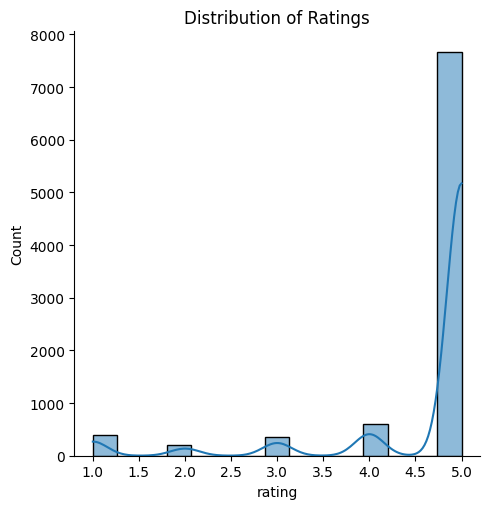

In [9]:
sns.displot(df["rating"], kde=True)  # Combining histogram and density plot
plt.title("Distribution of Ratings")
plt.show()

In [10]:
# **Calculate and store descriptive statistics for the "rating" column**
rating_stats = df["rating"].describe()
# Central Tendency Analysis
print("Mean:", rating_stats["mean"])
print("Median:", rating_stats["50%"])
# Calculate and print mode
print("Mode:", df["rating"].mode()[0])

Mean: 4.619181641047846
Median: 5.0
Mode: 5.0


In [11]:
# Dispersion Analysis
print("Standard Deviation:", rating_stats["std"])
print("Interquartile Range (IQR):", df["rating"].quantile(0.75) - df["rating"].quantile(0.25))

Standard Deviation: 0.9802797914611286
Interquartile Range (IQR): 0.0


In [12]:
# Get the counts for each rating value
rating_counts = df["rating"].value_counts().sort_index()

# Calculate total number of reviews
total_reviews = len(df)

# Print results in a formatted way
print("Rating | Count | Percentage")
print("-------|-------|------------")
for rating, count in rating_counts.items():
  # Calculate percentage as a string with two decimal places
  percentage = round((count / total_reviews) * 100, 2)
  print(f"{rating} | {count} | {percentage}%")

Rating | Count | Percentage
-------|-------|------------
1.0 | 398 | 4.31%
2.0 | 201 | 2.18%
3.0 | 358 | 3.88%
4.0 | 607 | 6.57%
5.0 | 7674 | 83.07%


Looking at the ratings, it's clear that most people (over 83%) gave the product 5 stars. This is a good sign, as successful products often receive high marks. However, it's important to remember that people sometimes tend to give more extreme ratings, either very positive or very negative. While the low number of 1-star ratings is positive, there's always a possibility that the data might be skewed towards more positive reviews.

###  2.2. Descriptive Statistics for the date feature:

In [13]:
# 2. Convert to Datetime Format
df["datetime"] = pd.to_datetime(df["date"])

In [14]:
# 3. Descriptive Statistics on Date Components
year_stats = df["datetime"].dt.year.describe()
month_stats = df["datetime"].dt.month.describe()
day_stats = df["datetime"].dt.day.describe()

In [15]:
# Print statistics
print("\nYear:")
print(year_stats)

print("\nMonth:")
print(month_stats)

print("\nDay:")
print(day_stats)


Year:
count    9238.000000
mean     2021.168976
std         2.040810
min      2005.000000
25%      2021.000000
50%      2021.000000
75%      2022.000000
max      2023.000000
Name: datetime, dtype: float64

Month:
count    9238.000000
mean        6.224291
std         3.067309
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: datetime, dtype: float64

Day:
count    9238.000000
mean       15.561485
std         8.886888
min         1.000000
25%         8.000000
50%        16.000000
75%        23.000000
max        31.000000
Name: datetime, dtype: float64


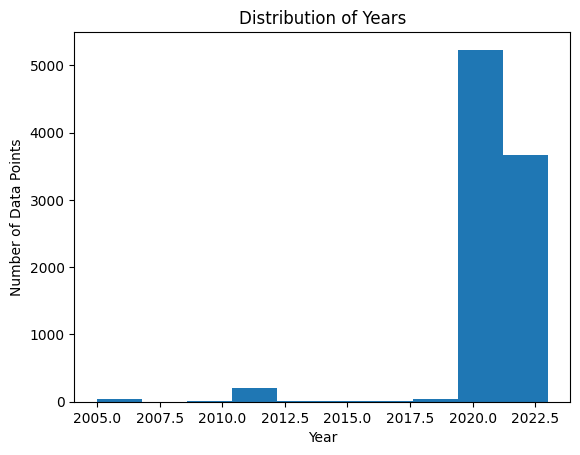

In [16]:
# Visualization Histogram of year distribution
plt.hist(df["datetime"].dt.year)
plt.xlabel("Year")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Years")
plt.show()

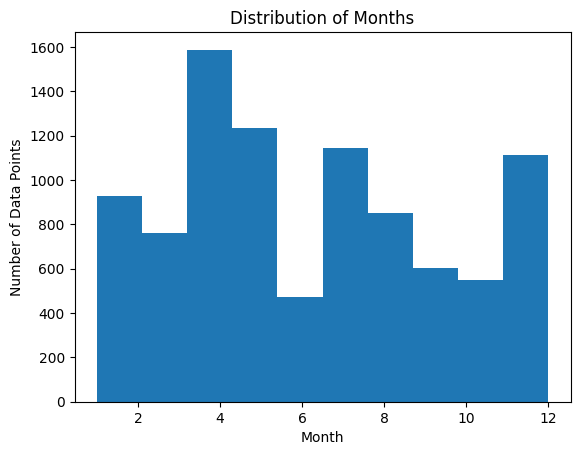

In [17]:
# Histogram of month distribution
plt.hist(df["datetime"].dt.month)
plt.xlabel("Month")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Months")
plt.show()

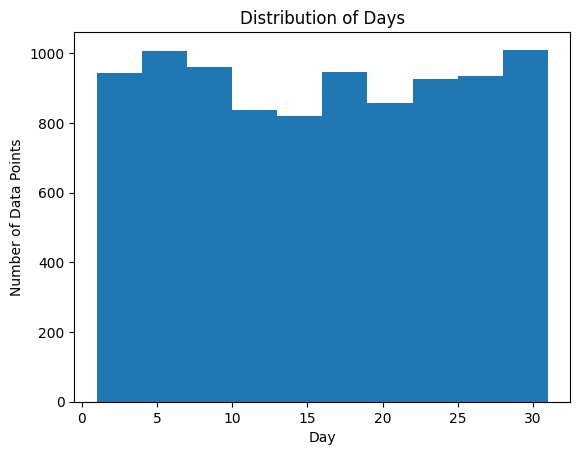

In [18]:
# Histogram of day distribution
plt.hist(df["datetime"].dt.day)
plt.xlabel("Day")
plt.ylabel("Number of Data Points")
plt.title("Distribution of Days")
plt.show()

In [19]:
# Count of data points per year
year_counts = df["datetime"].dt.year.value_counts().sort_index()

# Print the year-wise count
print("\nCount of Data Points per Year:")
print(year_counts)


Count of Data Points per Year:
2005       3
2006      42
2007       1
2008       2
2010       6
2011      97
2012     113
2013       9
2014       5
2015       8
2016      11
2017       7
2018       4
2019      30
2020      41
2021    5190
2022    2655
2023    1014
Name: datetime, dtype: int64


Our initial analysis revealed that a significant portion of the data falls within the years 2021, 2022, and 2023. Therefore, to focus on the most recent information and potentially improve the accuracy of our conclusions, we will be focusing our analysis on data points from these specific years.

In [20]:
# Filter data for years 2021, 2022, and 2023
df_filtered = df[df['datetime'].dt.year.isin([2021, 2022, 2023])]
print(df_filtered.info())
print(df_filtered.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 8859 entries, croc_review_0 to croc_review_9127
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   review    8859 non-null   object        
 1   date      8859 non-null   object        
 2   rating    8859 non-null   float64       
 3   datetime  8859 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 346.1+ KB
None
            rating
count  8859.000000
mean      4.619822
std       0.984960
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000


In [21]:
# Get the counts for each rating value
rating_counts = df_filtered["rating"].value_counts().sort_index()

# Calculate total number of reviews
total_reviews = len(df_filtered)

# Print results in a formatted way
print("Rating | Count | Percentage")
print("-------|-------|------------")
for rating, count in rating_counts.items():
  # Calculate percentage as a string with two decimal places
  percentage = round((count / total_reviews) * 100, 2)
  print(f"{rating} | {count} | {percentage}%")

Rating | Count | Percentage
-------|-------|------------
1.0 | 390 | 4.4%
2.0 | 190 | 2.14%
3.0 | 343 | 3.87%
4.0 | 552 | 6.23%
5.0 | 7384 | 83.35%


As we can see we get similar results in the filtered data.

###  2.3. Descriptive Statistics for the reviews:

In [22]:
# 1. Check Data Type and Missing Values:
print("Data type:", df_filtered["review"].dtype)
print("Number of missing values:", df_filtered["review"].isnull().sum())

Data type: object
Number of missing values: 0


In [23]:
# 2. Character Count:
print("\nCharacter count:")
print(f"Minimum characters: {df_filtered['review'].str.len().min()}")
print(f"Maximum characters: {df_filtered['review'].str.len().max()}")
print(f"Average characters: {df_filtered['review'].str.len().mean():.2f}")


Character count:
Minimum characters: 21
Maximum characters: 1741
Average characters: 117.08


In [24]:
# 3. Word Count:
print("\nWord count:")
print(f"Minimum words: {df_filtered['review'].str.split().str.len().min()}")
print(f"Maximum words: {df_filtered['review'].str.split().str.len().max()}")
print(f"Average words: {df_filtered['review'].str.split().str.len().mean():.2f}")


Word count:
Minimum words: 5
Maximum words: 329
Average words: 22.62


In [25]:
# 4. Unique Words:
print("\nUnique words:")
all_words = " ".join(df_filtered["review"].dropna())  # Combine all non-missing reviews for analysis
unique_word_count = len(set(all_words.split()))  # Count unique words
print(f"Total unique words: {unique_word_count}")


Unique words:
Total unique words: 12595


In [26]:
# Filter reviews with 5 or 6 words
filtered_reviews = df_filtered[df_filtered["review"].str.split().str.len().isin([5, 6])]

# Print some of the filtered reviews
print("Sample Reviews with 5 or 6 Words:")
for i in range(10):
  print(filtered_reviews.iloc[i]["review"])

Sample Reviews with 5 or 6 Words:
Absolutely FANTABULOUS!!!! I LOOOOOOOOOVE MY CROCS!!!
Adorable pop of color, super comfy
Again, so comfortable for daily wear.
All day long around the house.
All the time around the house.
Always a great fit, good color.
Amazing, so comfortable to wear anywhere.
Another great Crocs clog to enjoy.
Arrived quickly and were so comfortable!!!!
Asesome and Zappos is super quick.


It looks comprehensive enough for semantic analyzing. we can capture a misspell on the last review. which is good. We need to understand the reviews are human generated and human makes mistakes, therefor the best practice here is to use a deep learning model to do the semantic analyse, to help us capture those hidden and hard to capture connections.

## **3**. Data Preprocessing


As we saw at 2.2 we can filter our data by years > 2020:

In [27]:
# keep the data for years 2021, 2022, and 2023
filtered_df = df[df['datetime'].dt.year.isin([2021, 2022, 2023])]

In [28]:
# As we will see this preprocessing is needed for the reviews:
def preprocess_text(text):
    # Remove leading and trailing punctuation
    text = text.strip('!?.,"\'()[]{}:;')

    # Remove consecutive duplicate punctuation marks
    text = re.sub(r'([^\w\s]|_)\1+', r'\1', text)

    # Concatenate consecutive uppercase characters with spaces between them
    text = re.sub(r'(?<=[A-Z]) (?=[A-Z])', '', text)
    text = re.sub(r'(?<=[A-Z]) (?=[^\w\s])', '', text)
    text = re.sub(r'(?<=[^\w\s]) (?=[A-Z])', '', text)

    # Concatenate consecutive characters with spaces between them if there are more than 2 characters
    text = re.sub(r'(?<=\S)(?:\s*(?=\S\s\S)\s*){2,}', '', text)

    return text

for i in range(10):
  print(filtered_df["review"].iloc[i])
  print(preprocess_text(filtered_df["review"].iloc[i]))
  print('|')

!!!!!! E X C E L L E N T!!!!!!!!!!
 EXCELLENT
|
"They're crocs; people know what crocs are."
They're crocs; people know what crocs are
|
- Quick delivery and the product arrived when the company said it would. - First pair of Crocs, and they fit perfectly.
-Quick delivery and the product arrived when the company said it would. -First pair of Crocs, and they fit perfectly
|
...amazing "new" color!! who knew?? love - love - love it.
amazing "new" color! who knew? love- love- love it
|
0 complaints from me; this is the 8th pair of crocs I've bought in like two months of discovering crocs.
0 complaints from me; this is the 8th pair of crocs I've bought in like two months of discovering crocs
|
10/10 I ran from the cops in mine, and they are still in perfect condition, didn't fall off! I def recommend them!
10/10I ran from the cops in mine, and they are still in perfect condition, didn't fall off!I def recommend them
|
The 11 year old granddaughter loves them!!!!!!
The 11 year old granddaug

In [29]:
# Apply the preprocessing to the 'review' column
filtered_df['review'] = filtered_df['review'].apply(preprocess_text)
filtered_df.drop(columns=['date'], inplace=True)

<ipython-input-29-d9a29044a2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['review'] = filtered_df['review'].apply(preprocess_text)
<ipython-input-29-d9a29044a2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['date'], inplace=True)


In [30]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8859 entries, croc_review_0 to croc_review_9127
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   review    8859 non-null   object        
 1   rating    8859 non-null   float64       
 2   datetime  8859 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 276.8+ KB


More over, there is no need for preprocessing the text as we saw in 2.3 or preprocessing the ratings as we saw at 2.1.
It is worth to mention that in the text reviews we can lower case/ or do some other manipulations, but our model is strong and capable to understand hidden semantics, and can understand complex phrases, made by human with human biases and misspels. so we dont want to iterfere that.

## **4**. Model Selection
### we will use a build in model from the hugging face Transformers library. [Transformers by Hugging Face](https://huggingface.co/docs/transformers/task_summary), 🤗 Transformers is a library of pretrained state-of-the-art models for natural language processing (NLP).



In [31]:
sentiment_analysis_pipeline = pipeline("sentiment-analysis", model='nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

the model for the pipeline is set as defult to:
distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b  

[the DistilBERT nodel](https://huggingface.co/docs/transformers/model_doc/distilbert)

In [32]:
# example for usage in the pipeline-
print(sentiment_analysis_pipeline('U should register Aviv for work, he whould do a great job!', top_k=5))
print(sentiment_analysis_pipeline('I dont know what to think about that product'))
print(sentiment_analysis_pipeline('nice'))
print(sentiment_analysis_pipeline('I dont have an opinion about that model'))
print(sentiment_analysis_pipeline('neutral', top_k=5))

[{'label': '5 stars', 'score': 0.5535928606987}, {'label': '4 stars', 'score': 0.2730450928211212}, {'label': '3 stars', 'score': 0.10073070228099823}, {'label': '1 star', 'score': 0.03864976763725281}, {'label': '2 stars', 'score': 0.033981602638959885}]
[{'label': '1 star', 'score': 0.3515641391277313}]
[{'label': '4 stars', 'score': 0.4368409514427185}]
[{'label': '1 star', 'score': 0.34609270095825195}]
[{'label': '3 stars', 'score': 0.26949021220207214}, {'label': '1 star', 'score': 0.21526992321014404}, {'label': '4 stars', 'score': 0.21188130974769592}, {'label': '2 stars', 'score': 0.15994271636009216}, {'label': '5 stars', 'score': 0.14341576397418976}]


We can see that we have a freedom to map stars into positive, negative and neutral.

In [58]:
def analyze_sentiment_naive(text, rating):
    """
    Analyzes sentiment based on a list of scores and adjusts based on the rating.

    Args:
        text: The text to analyze.
        rating: The rating associated with the sentiment.

    Returns:
        A string representing the sentiment ("POSITIVE", "NEGATIVE", or "NEUTRAL").
    """
    scores = sentiment_analysis_pipeline(text, top_k=2)

    # Extract the top 2 labels and scores
    top1_label, top1_score = scores[0]['label'], scores[0]['score']
    top2_label, top2_score = scores[1]['label'], scores[1]['score']

    # Calculate weighted sum for the top 2 labels and the actual rating
    weighted_sum = (int(top1_label[0]) * top1_score + int(top2_label[0]) * top2_score) / 3 + rating * 2 / 3

    # Determine the sentiment based on proximity to 5, 3, or 1
    if weighted_sum > 3.5:
        sentiment = 'POSITIVE'
    elif weighted_sum < 2.2:
        sentiment = 'NEGATIVE'
    else:
        sentiment = 'NEUTRAL'

    return sentiment


## **5**. Model Evaluation


In [59]:
# A problem with our model-
print(df["review"].iloc[0])
print(sentiment_analysis_pipeline(df["review"].iloc[0], top_k=2))

!!!!!! E X C E L L E N T!!!!!!!!!!
[{'label': '1 star', 'score': 0.5536035299301147}, {'label': '2 stars', 'score': 0.14928916096687317}]


As we can see we occur a problem there. and the data need some preprocessing.

In [60]:
# solution
def preprocess_text(text):
    # Remove leading and trailing punctuation
    text = text.strip('!?.,"\'()[]{}:;')

    # Remove consecutive duplicate punctuation marks
    text = re.sub(r'([^\w\s]|_)\1+', r'\1', text)

    # Concatenate consecutive uppercase characters with spaces between them
    text = re.sub(r'(?<=[A-Z]) (?=[A-Z])', '', text)
    text = re.sub(r'(?<=[A-Z]) (?=[^\w\s])', '', text)
    text = re.sub(r'(?<=[^\w\s]) (?=[A-Z])', '', text)

    # Concatenate consecutive characters with spaces between them if there are more than 2 characters
    text = re.sub(r'(?<=\S)(?:\s*(?=\S\s\S)\s*){2,}', '', text)

    return text

for i in range(10):
  print(df["review"].iloc[i])
  print(preprocess_text(df["review"].iloc[i]))
  print('|')

!!!!!! E X C E L L E N T!!!!!!!!!!
 EXCELLENT
|
"They're crocs; people know what crocs are."
They're crocs; people know what crocs are
|
- Quick delivery and the product arrived when the company said it would. - First pair of Crocs, and they fit perfectly.
-Quick delivery and the product arrived when the company said it would. -First pair of Crocs, and they fit perfectly
|
...amazing "new" color!! who knew?? love - love - love it.
amazing "new" color! who knew? love- love- love it
|
0 complaints from me; this is the 8th pair of crocs I've bought in like two months of discovering crocs.
0 complaints from me; this is the 8th pair of crocs I've bought in like two months of discovering crocs
|
10/10 I ran from the cops in mine, and they are still in perfect condition, didn't fall off! I def recommend them!
10/10I ran from the cops in mine, and they are still in perfect condition, didn't fall off!I def recommend them
|
The 11 year old granddaughter loves them!!!!!!
The 11 year old granddaug

In [61]:
# We fixed the problem-
print(df["review"].iloc[0], df["rating"].iloc[0])
print(sentiment_analysis_pipeline(preprocess_text(df["review"].iloc[0]), top_k=2))

!!!!!! E X C E L L E N T!!!!!!!!!! 5.0
[{'label': '5 stars', 'score': 0.8669129014015198}, {'label': '4 stars', 'score': 0.11125952750444412}]


So we will add this in the preprocess section.

In [62]:
# Sample 2% of the rows randomly
sample = filtered_df.sample(frac=0.02, random_state=42)  # Replace 42 with any desired seed for reproducibility
print(len(sample))

# Apply sentiment analysis to each review and store the result in a new column
sample["sentiment"] = sample.apply(lambda row: analyze_sentiment_naive(row["review"], row["rating"]), axis=1)

177


In [63]:
print(sample.head(20))

                                                             review  rating  \
id                                                                            
croc_review_3626                   I love these for the summer time     5.0   
croc_review_7283  The crocs fit me just right, and the color is ...     5.0   
croc_review_803   Finally!My "PEPPER" color CLASSICCROCS!NowI ca...     5.0   
croc_review_8898   Very comfy.The color was beautiful, true to size     5.0   
croc_review_3235  I love the color purple, and these shoes had t...     5.0   
croc_review_993        Great Crocks.I dreamed about it for 10 years     5.0   
croc_review_3043  I love my crocs!They are very comfortable.It f...     5.0   
croc_review_2236  I got them for my dad asa Christmas gift, and ...     5.0   
croc_review_4411  I was not aware that the product was made in V...     3.0   
croc_review_4776        I'ma tech ina hospital, and they feel great     5.0   
croc_review_1272  Hiked in them when the trail wasn'

In [64]:
# some interesting example... is that POSITIVE or NEUTRAL ?
print(sample.loc['croc_review_2840']['review'])
print(sample.loc['croc_review_2840']['rating'])
print(sample.loc['croc_review_2840']['sentiment'])

I love crocs.With that said,I will also say that sometimesI get two pairs of the same exact size and they're slightly different in the arch.That's what you get witha mold
5.0
POSITIVE


In [65]:
# some interesting example... This one is hard to capture, note that 3 stars is usually neutral.
print(sample.loc['croc_review_4411']['review'])
print(sample.loc['croc_review_4411']['rating'])
print(sample.loc['croc_review_4411']['sentiment'])

I was not aware that the product was made in Vietnam and China.The product is overpriced, and shipping took 17 days
3.0
NEUTRAL


lets take a look of missmatched sentiment and ratings:

In [66]:
positive_low_rating_reviews = sample[(sample['sentiment'] == 'POSITIVE') & (sample['rating'] <= 4)]
for index, row in positive_low_rating_reviews.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

4.0
croc_review_8867:	Very comfortable.The color is ver yellow and not lime yellow in the picture
[{'label': '4 stars', 'score': 0.5419479608535767}, {'label': '5 stars', 'score': 0.30810704827308655}]
4.0
croc_review_7313:	The first pair I've owned, andI love them.I suffer with foot pain, and these really help.I will be purchasing additional pairs
[{'label': '5 stars', 'score': 0.8582723736763}, {'label': '4 stars', 'score': 0.1309296190738678}]
4.0
croc_review_6741:	Shoe is decent; it does the job.Don't pay for the quick shipment because it does not come in the time they give you, and they tell you it's not their fault and won't refund you expedited shipping
[{'label': '3 stars', 'score': 0.6365705132484436}, {'label': '4 stars', 'score': 0.2656480669975281}]
4.0
croc_review_6653:	Rather pricey fora plastic SHOE- but they are what my grandsons wanted
[{'label': '3 stars', 'score': 0.4429547190666199}, {'label': '4 stars', 'score': 0.38408857583999634}]
4.0
croc_review_7045:	Super cut

Note that even if the reviews didnt got 5 star rating, we did managed to map them correctly.



In [67]:
negative_high_rating_reviews = sample[(sample['sentiment'] == 'NEGATIVE') & (sample['rating'] >= 2)]
for index, row in negative_high_rating_reviews.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

2.0
croc_review_6775:	Sizing is different from other crocs
[{'label': '3 stars', 'score': 0.37140321731567383}, {'label': '4 stars', 'score': 0.24140003323554993}]
2.0
croc_review_6350:	Not as soft as my old Crocs
[{'label': '3 stars', 'score': 0.6484664678573608}, {'label': '2 stars', 'score': 0.24863789975643158}]
2.0
croc_review_561:	Crocs are great.however, it took2 1/2 weeks to get my order from them.First time ordering from the website.will not order again
[{'label': '2 stars', 'score': 0.4372004568576813}, {'label': '3 stars', 'score': 0.3040655553340912}]
2.0
croc_review_4134:	I takea men's9 1/2 shoe size.I ordereda9 in the Croc Clog black.They were manufactured in China instead of Vietnam as in the past.The Crocs were so oversized upon arrival thatI was floating in them likea size 10.I was going to send them back and even called to make the arrangements.But instead,I read online that you can shrink them ina dryer.I followed that online procedure, and they are nowa perfect fit.

Note that even if the reviews didnt got 1 star rating, we did managed to map them correctly.

In [69]:
neutral_high_rating_reviews = sample[(sample['sentiment'] == 'NEUTRAL') & (sample['rating'] >= 4)]
for index, row in neutral_high_rating_reviews.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

4.0
croc_review_7482:	The right strap is upside down and bigger than the left
[{'label': '2 stars', 'score': 0.43093785643577576}, {'label': '1 star', 'score': 0.2989359200000763}]
4.0
croc_review_2340:	I had always used this model; they run small now
[{'label': '3 stars', 'score': 0.36462998390197754}, {'label': '2 stars', 'score': 0.35813358426094055}]


In [71]:
neutral_low_rating_reviews = sample[(sample['sentiment'] == 'NEUTRAL') & (sample['rating'] <= 2)]
for index, row in neutral_low_rating_reviews.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

As we can infer, the naive sentiment analysis was sucssesful overall.

In [73]:
# run the model over the filtered data set
# Apply sentiment analysis to each review and store the result in a new column
filtered_df["sentiment"] = filtered_df.apply(lambda row: analyze_sentiment_naive(row["review"], row["rating"]), axis=1)

In [74]:
sentiment_distribution = filtered_df["sentiment"].value_counts()
print(sentiment_distribution)

POSITIVE    7784
NEGATIVE     562
NEUTRAL      513
Name: sentiment, dtype: int64


In [75]:
average_sentiment_by_rating = filtered_df.groupby("rating")["sentiment"].value_counts(normalize=True).unstack().fillna(0)
print(average_sentiment_by_rating)


sentiment  NEGATIVE   NEUTRAL  POSITIVE
rating                                 
1.0        0.997436  0.002564  0.000000
2.0        0.910526  0.089474  0.000000
3.0        0.000000  0.988338  0.011662
4.0        0.000000  0.282609  0.717391
5.0        0.000000  0.000000  1.000000


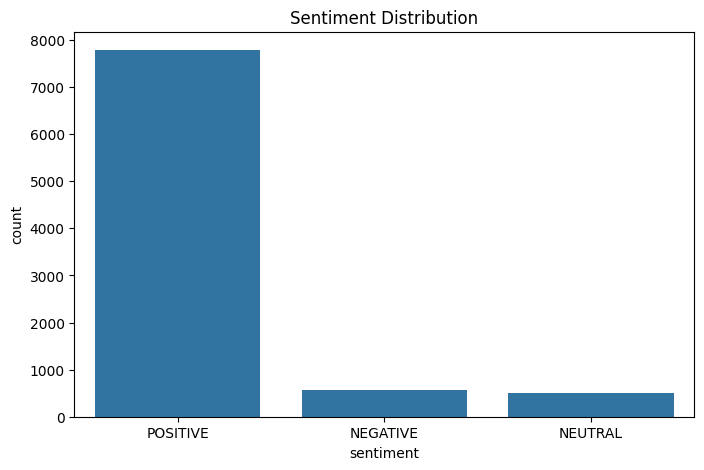

In [76]:
# Bar plot of sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment", data=filtered_df)
plt.title("Sentiment Distribution")
plt.show()

In [77]:
positive_low_rating_reviews_ = filtered_df[(filtered_df['sentiment'] == 'POSITIVE') & (filtered_df['rating'] <= 3)]
for index, row in positive_low_rating_reviews_.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

3.0
croc_review_1189:	Great shoes.I have loved them this summer.Buta word of caution.Don't leave them in the sun.Mine shranka size.I've read you can shrink them by hearing them again and wearing them
[{'label': '5 stars', 'score': 0.8293255567550659}, {'label': '4 stars', 'score': 0.15428520739078522}]
3.0
croc_review_2574:	I have wide feet and flat feet, so these are definitely my go-to.They fit great and are not tight on my feet!I like the variety of colors to choose from too
[{'label': '5 stars', 'score': 0.7693585753440857}, {'label': '4 stars', 'score': 0.22110465168952942}]
3.0
croc_review_3716:	I love this already, and it's only my first pair of Converse ever
[{'label': '5 stars', 'score': 0.7318488359451294}, {'label': '4 stars', 'score': 0.24105840921401978}]
3.0
croc_review_4485:	I wear crocs basically every day, andI love them
[{'label': '5 stars', 'score': 0.7338131070137024}, {'label': '4 stars', 'score': 0.22523637115955353}]


In [79]:
negative_high_rating_reviews_ = filtered_df[(filtered_df['sentiment'] == 'NEGATIVE') & (filtered_df['rating'] >= 3)]
for index, row in negative_high_rating_reviews_.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

In [82]:
neutral_rating_reviews = filtered_df[(filtered_df['sentiment'] == 'NEUTRAL') & (filtered_df['rating'] == 1)]
for index, row in neutral_rating_reviews.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

1.0
croc_review_6527:	Perfect for working in the garden.I left them on my porch and came back two days later and couldn't get my foot in them.Don't leave them outside in the sun
[{'label': '5 stars', 'score': 0.8532690405845642}, {'label': '4 stars', 'score': 0.13172191381454468}]


In [85]:
neutral_rating_reviews_ = filtered_df[(filtered_df['sentiment'] == 'NEUTRAL') & (filtered_df['rating'] == 5)]
for index, row in neutral_rating_reviews_.iterrows():
  print(row['rating'])
  print(f"{index}:\t{row['review']}")
  print(sentiment_analysis_pipeline(row['review'], top_k=2))

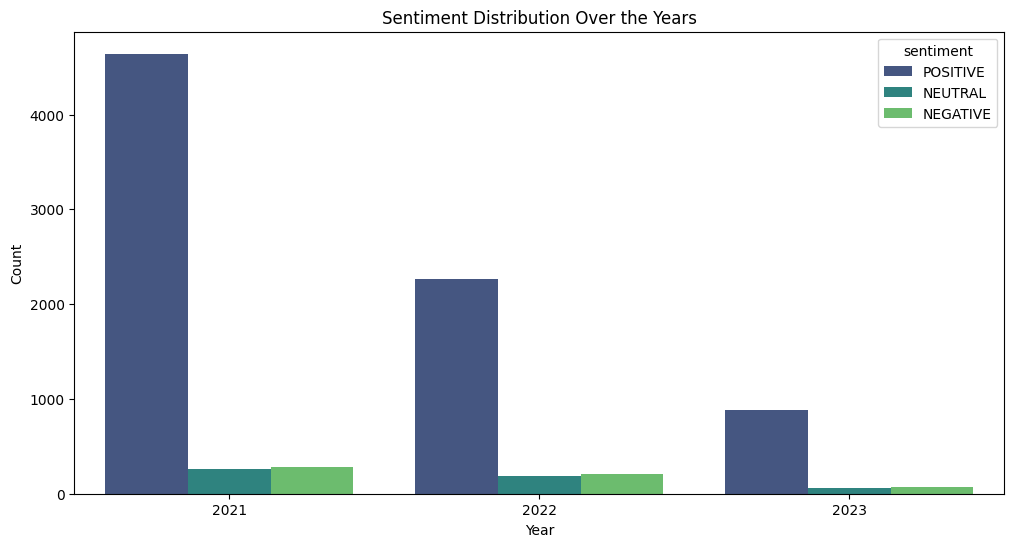

In [87]:
# Create a count plot to visualize sentiment distribution over time
plt.figure(figsize=(12, 6))
sns.countplot(x=filtered_df['datetime'].dt.year, hue='sentiment', data=filtered_df, palette='viridis')
plt.title('Sentiment Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

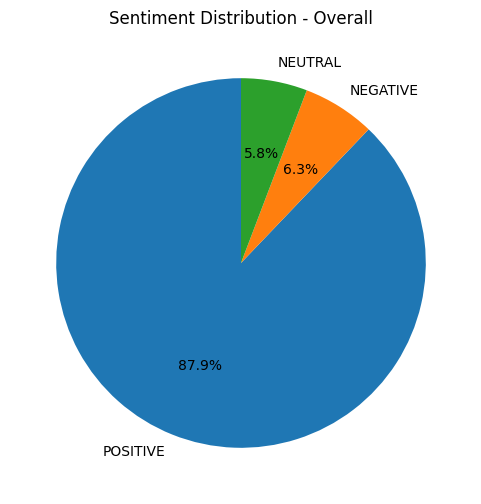

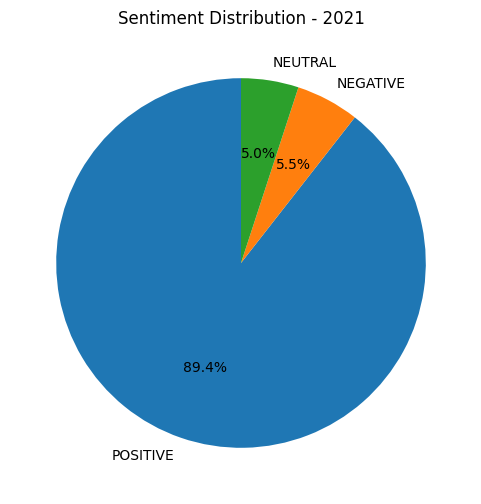

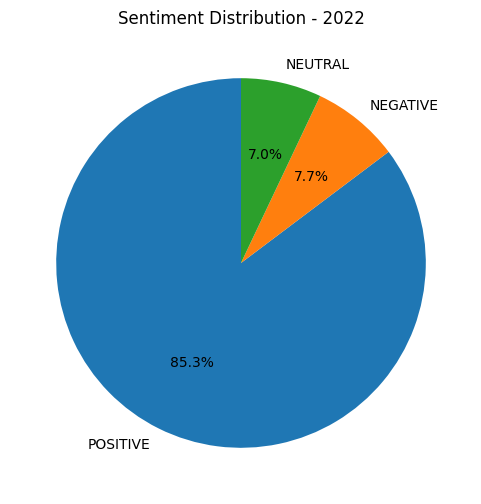

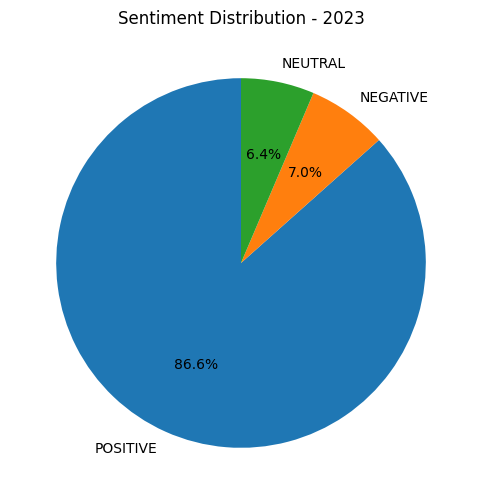

In [95]:
sentiment_distribution = filtered_df['sentiment'].value_counts()

# Plotting a pie chart for the overall sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution - Overall')
plt.show()

# Plotting pie charts for each year (2021-2023)
for year in range(2021, 2024):
    data_slice = filtered_df.loc[filtered_df['datetime'].dt.year == year, 'sentiment'].value_counts()

    # Plotting a pie chart for each year
    plt.figure(figsize=(6, 6))
    plt.pie(data_slice, labels=data_slice.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Sentiment Distribution - {year}')
    plt.show()

We can see a trend of a moderate decrease in the sentiment of the review of the product.

## **6**. Conclusion and Future Work:



## Key Findings:

The sentiment analysis model works well and provides deep understanding of complex reviews. incorporating a weighted sum of the top 2 scores, provides a nuanced understanding of sentiment in reviews.

##Potential Limitations:

1.   Dependency on Pre-trained Model: The accuracy of sentiment analysis heavily relies on the pre-trained model's performance, even though he trained on reviews and build for sentiment analysis.
2.   Subjectivity in Rating Interpretation: Assigning sentiments based on rating thresholds introduces subjectivity, as different users may interpret ratings differently.
3.  Limited Context Understanding: The model may struggle to capture nuances (sarcasm etc) or context-specific meanings in reviews, potentially leading to misclassifications.
4. Sensitivity to Top-K Selection: The sentiment may be sensitive to the choice of the top-k scores, and changes in the model or data could impact results.
5. Handling Out-of-Vocabulary Terms: The model may struggle with out-of-vocabulary terms or domain-specific language not covered during pre-training.



## We'll suggest possible areas for future improvement:


1. Fine-Tuning on Domain-Specific Data:  
 Fine-tuning the sentiment analysis model on domain-specific data can enhance its understanding of industry-specific language and context.
2. Integrating different models together:  
Integrating different models entails combining diverse machine learning approaches for enhanced system performance and problem-solving. This strategy leverages the strengths of individual models to achieve improved accuracy and robustness.
3. Handling Sarcasm and Irony:  
Implementing strategies to identify and handle sarcasm or irony in reviews, as these linguistic nuances can significantly impact sentiment but may be challenging for models to interpret.
4. Dynamic Weighting Strategies:  
Experimenting with dynamic weighting strategies for the top-k scores, adapting the weights based on specific characteristics of the reviews or sentiments.
5. Making the computation faster:  
Implementing optimization techniques such as parallel processing, distributed computing, or model quantization to accelerate the computation speed, ensuring a more efficient and responsive system for analyzing reviews.
6. Comparing different analysers for this specific model:  
in this analysis we focused on a naive analyser, and didnt explored other ways of labeling. future work can include using complexed methods of analysis.
7. Trying other models, such as advanced deep learning or nltk.



